In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pywaffle import Waffle
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [25]:
#holidays_events table
holidays_events = pd.read_csv("Data/holidays_events.csv")
holidays_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,0
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,0
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,0
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,0
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,0
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,0
346,2017-12-23,Additional,National,Ecuador,Navidad-2,0
347,2017-12-24,Additional,National,Ecuador,Navidad-1,0
348,2017-12-25,Holiday,National,Ecuador,Navidad,0


In [27]:
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 16.5+ KB


In [29]:
holidays_events.describe()

,transferred
count,350.000000
mean,0.034286
std,0.182223
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [31]:
print(holidays_events["type"].value_counts())

type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64


In [33]:
print(holidays_events["locale"].unique())  
print(holidays_events["description"].nunique())

['Local' 'Regional' 'National']
103


In [5]:
dtypes = {
    "id": "int32",
    "store_nbr": "int16",
    "item_nbr": "int32",
    "unit_sales": "float32",
    "onpromotion": "category"
}
train = pd.read_csv('Data/train.csv',dtype=dtypes)
train

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,0
1,1,2013-01-01,25,105574,1.0,0
2,2,2013-01-01,25,105575,2.0,0
3,3,2013-01-01,25,108079,1.0,0
4,4,2013-01-01,25,108701,1.0,0
...,...,...,...,...,...,...
125497035,125497035,2017-08-15,54,2089339,4.0,0
125497036,125497036,2017-08-15,54,2106464,1.0,1
125497037,125497037,2017-08-15,54,2110456,19.5,0
125497038,125497038,2017-08-15,54,2113914,19.5,1


In [8]:
print(train.columns)

Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion'], dtype='object')


In [9]:
train.describe()

,id,store_nbr,item_nbr,unit_sales
count,1.254970e+08,1.254970e+08,1.254970e+08,1.254970e+08
mean,6.274852e+07,2.746458e+01,9.727692e+05,6.336342e+00
std,3.622788e+07,1.633051e+01,5.205336e+05,5.801024e+00
min,0.000000e+00,1.000000e+00,9.699500e+04,-8.500000e+00
25%,3.137426e+07,1.200000e+01,5.223830e+05,2.000000e+00
50%,6.274852e+07,2.800000e+01,9.595000e+05,4.000000e+00
75%,9.412278e+07,4.300000e+01,1.354380e+06,9.000000e+00
max,1.254970e+08,5.400000e+01,2.127114e+06,1.950000e+01


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125497040 entries, 0 to 125497039
Data columns (total 6 columns):
 #   Column       Dtype   
---  ------       -----   
 0   id           int32   
 1   date         object  
 2   store_nbr    int16   
 3   item_nbr     int32   
 4   unit_sales   float32 
 5   onpromotion  category
dtypes: category(1), float32(1), int16(1), int32(2), object(1)
memory usage: 2.7+ GB


In [7]:
#items table
items = pd.read_csv("Data/items.csv")
items

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
...,...,...,...,...
4095,2132318,GROCERY I,1002,0
4096,2132945,GROCERY I,1026,0
4097,2132957,GROCERY I,1068,0
4098,2134058,BEVERAGES,1124,0


In [12]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_nbr    4100 non-null   int64 
 1   family      4100 non-null   object
 2   class       4100 non-null   int64 
 3   perishable  4100 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 128.3+ KB


In [13]:
items.describe()

,item_nbr,class,perishable
count,4.100000e+03,4100.0000,4100.000000
mean,1.251436e+06,2169.6500,0.240488
std,5.876872e+05,1484.9109,0.427432
min,9.699500e+04,1002.0000,0.000000
25%,8.181108e+05,1068.0000,0.000000
50%,1.306198e+06,2004.0000,0.000000
75%,1.904918e+06,2990.5000,0.000000
max,2.134244e+06,7780.0000,1.000000


In [14]:
print(items.columns)

Index(['item_nbr', 'family', 'class', 'perishable'], dtype='object')


In [15]:
items.shape

(4100, 4)

In [16]:
items.isnull().sum()

item_nbr      0
family        0
class         0
perishable    0
dtype: int64

In [9]:
#oil table
oil = pd.read_csv("Data/oil.csv")
oil.head()

,date,dcoilwtico,oil_price_change
0,2013-01-02,93.14,0.000000
1,2013-01-03,92.97,-0.001825
2,2013-01-04,93.12,0.001613
3,2013-01-07,93.20,0.000859
4,2013-01-08,93.21,0.000107


In [18]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              1217 non-null   object 
 1   dcoilwtico        1217 non-null   float64
 2   oil_price_change  1217 non-null   float64
dtypes: float64(2), object(1)
memory usage: 28.7+ KB


In [19]:
oil.describe()

,dcoilwtico,oil_price_change
count,1217.000000,1217.000000
mean,67.652399,-0.000310
std,25.637477,0.022308
min,26.190000,-0.105292
25%,46.410000,-0.011382
50%,53.180000,0.000000
75%,95.610000,0.009663
max,110.620000,0.119511


In [20]:
print(oil.columns)

Index(['date', 'dcoilwtico', 'oil_price_change'], dtype='object')


In [11]:
stores = pd.read_csv("Data/stores.csv")
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [39]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [40]:
stores.describe()

,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


In [41]:
stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [42]:
print(stores.columns)

Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')


In [23]:
transactions = pd.read_csv("Data/transactions.csv")
transactions.head()

,date,store_nbr,transactions,avg_transaction_per_store
0,2013-01-01,25,770.0,941.400619
1,2013-01-02,1,2111.0,1523.844272
2,2013-01-02,2,2358.0,1919.507752
3,2013-01-02,3,3487.0,3155.176313
4,2013-01-02,4,1922.0,1502.987470


In [47]:
transactions.describe()

,store_nbr,transactions,avg_transaction_per_store
count,83488.000000,83488.000000,83488.000000
mean,26.939237,1653.219666,1653.219666
std,15.608204,844.466996,798.330176
min,1.000000,5.000000,634.719309
25%,13.000000,1046.000000,1066.291592
50%,27.000000,1393.000000,1396.733822
75%,40.000000,2079.000000,2095.761635
max,54.000000,3628.500000,3607.044425


In [48]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       83488 non-null  object 
 1   store_nbr                  83488 non-null  int64  
 2   transactions               83488 non-null  float64
 3   avg_transaction_per_store  83488 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ MB


In [49]:
product_sales = train.groupby('item_nbr')['unit_sales'].sum().reset_index()
product_sales_sorted = product_sales.sort_values(by='unit_sales', ascending=False)
print(product_sales_sorted)

      item_nbr  unit_sales
393     364606   1549056.0
574     502331   1536006.0
240     265559   1493610.0
302     314384   1445862.0
658     559870   1384104.5
...        ...         ...
4016   2122947         5.0
4014   2122818         4.0
4024   2123747         3.0
3708   2015898         1.0
3671   2011451         1.0

[4036 rows x 2 columns]


In [50]:
# حساب إجمالي المبيعات لكل منتج
product_sales = train.groupby('item_nbr')['unit_sales'].sum().reset_index()
product_sales

,item_nbr,unit_sales
0,96995,9324.5
1,99197,16224.5
2,103501,164369.0
3,103520,195878.5
4,103665,218492.0
...,...,...
4031,2123863,17.0
4032,2124052,4690.0
4033,2126842,19.0
4034,2126944,5.0


In [51]:
# حساب متوسط بيع المنتجات 
mean_sales = product_sales['unit_sales'].mean()
# حساب الوسيط لمعدل بيع المنتجات
mode_sales = product_sales['unit_sales'].mode()[0]
# حساب الانحراف المعياري لمعدل بيع المنتجات
std_sales = product_sales['unit_sales'].std()
print(f"Mean Sales per Product: {mean_sales}")
print(f"Mode Sales per Product: {mode_sales}")
print(f"Standard Deviation of Sales per Product: {std_sales}")

Mean Sales per Product: 197024.9375
Mode Sales per Product: 1.0
Standard Deviation of Sales per Product: 201146.71875


In [52]:
transactions['date'] = pd.to_datetime(transactions['date'])
transactions['year'] = transactions['date'].dt.year
transactions['month'] = transactions['date'].dt.month
transactions['day'] = transactions['date'].dt.day
transactions['day_of_week'] = transactions['date'].dt.dayofweek


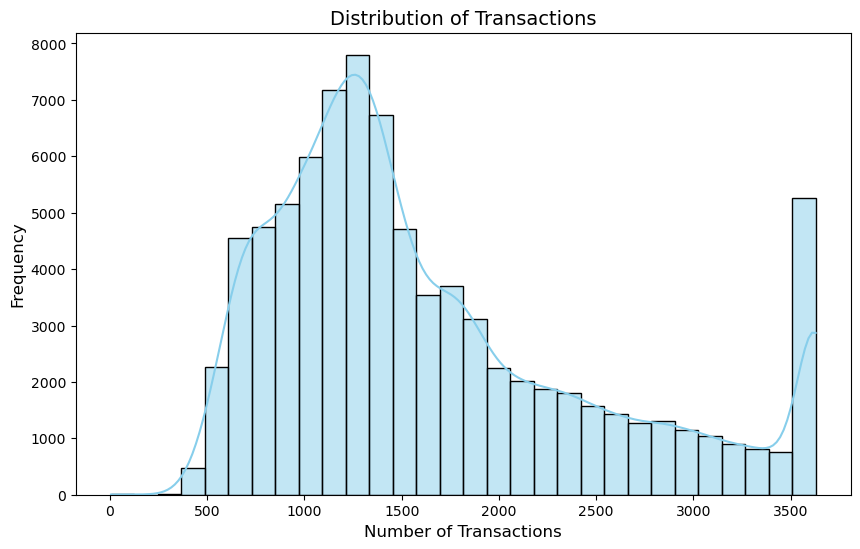

In [53]:
plt.figure(figsize=(10,6))
sns.histplot(transactions['transactions'], bins=30, kde=True,color='skyblue')

plt.title('Distribution of Transactions', fontsize=14)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)



plt.show()

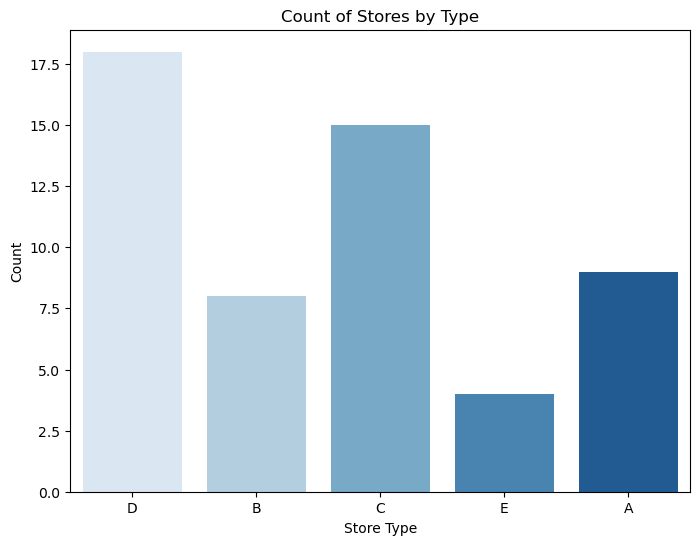

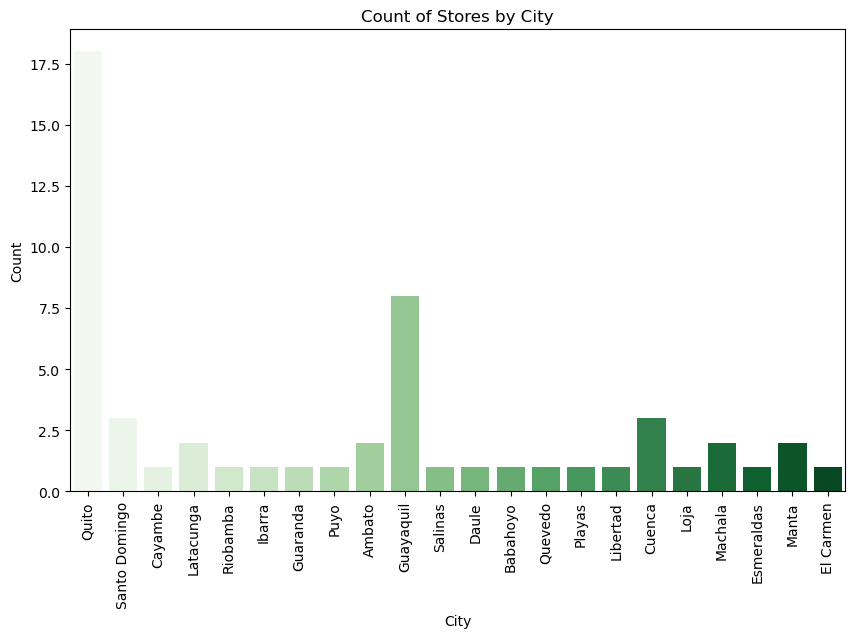

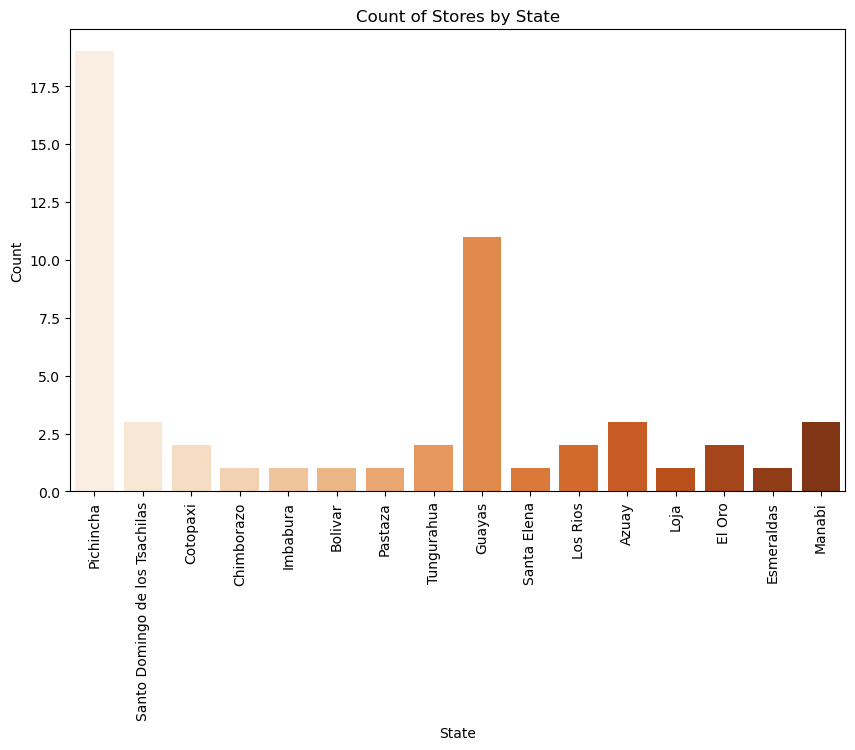

In [54]:
###count the NO.of stores by type
plt.figure(figsize=(8, 6))
sns.countplot(x='type', hue='type', data=stores, palette='Blues', legend=False)
plt.title('Count of Stores by Type')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

####count the NO.of stores by city
plt.figure(figsize=(10, 6))
sns.countplot(x='city', hue='city', data=stores, palette='Greens', legend=False)
plt.xticks(rotation=90)  
plt.title('Count of Stores by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

####count the NO.of stores by state
plt.figure(figsize=(10, 6))
sns.countplot(x='state', hue='state', data=stores, palette='Oranges', legend=False)
plt.xticks(rotation=90)
plt.title('Count of Stores by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

In [55]:
#This function calculates the count of each category in a given categorical column of a DataFrame, 
# prints the count, and then plots a bar chart to visualize the distribution.
def get_different_categories(df,categorical_attribute):
    temp=df[categorical_attribute].value_counts()
    print(temp)
    temp.plot.bar() 

cluster
3     7
6     6
10    6
15    5
13    4
14    4
11    3
4     3
8     3
1     3
9     2
7     2
2     2
12    1
5     1
16    1
17    1
Name: count, dtype: int64


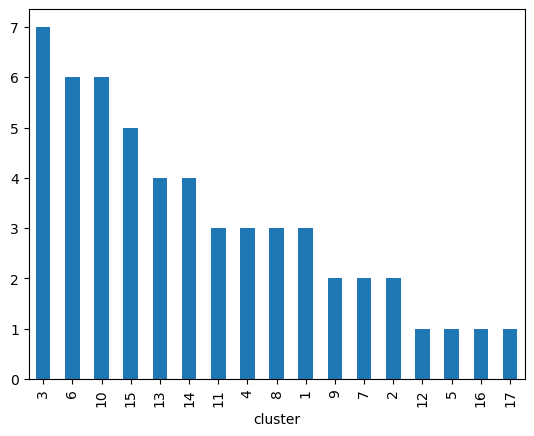

In [56]:
get_different_categories(stores,'cluster')

C:\Users\Esraa\AppData\Local\Temp\ipykernel_2224\2414742164.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_sales.index, y=store_sales.values, palette="viridis",legend=False)


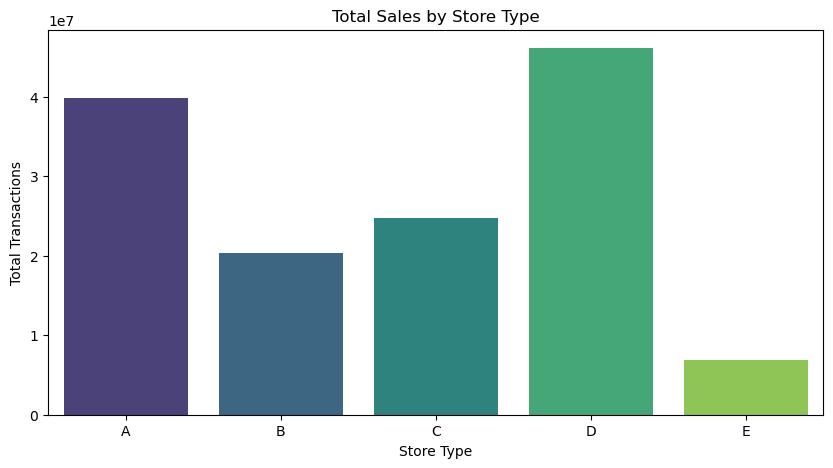

In [57]:

# Merge transactions data with store information
merged_df = transactions.merge(stores, on="store_nbr")
# Group transactions by store type and calculate total sales
store_sales = merged_df.groupby('type')['transactions'].sum()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=store_sales.index, y=store_sales.values, palette="viridis",legend=False)
plt.title("Total Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Total Transactions")
plt.show()

family
GROCERY I                     1334
BEVERAGES                      613
CLEANING                       446
PRODUCE                        306
DAIRY                          242
PERSONAL CARE                  153
BREAD/BAKERY                   134
HOME CARE                      108
DELI                            91
MEATS                           84
HOME AND KITCHEN I              77
LIQUOR,WINE,BEER                73
FROZEN FOODS                    55
POULTRY                         54
HOME AND KITCHEN II             45
EGGS                            41
CELEBRATION                     31
LAWN AND GARDEN                 26
PREPARED FOODS                  26
LADIESWEAR                      21
AUTOMOTIVE                      20
LINGERIE                        20
BEAUTY                          19
PLAYERS AND ELECTRONICS         17
SCHOOL AND OFFICE SUPPLIES      15
GROCERY II                      14
PET SUPPLIES                    14
SEAFOOD                          8
MAGAZINES    

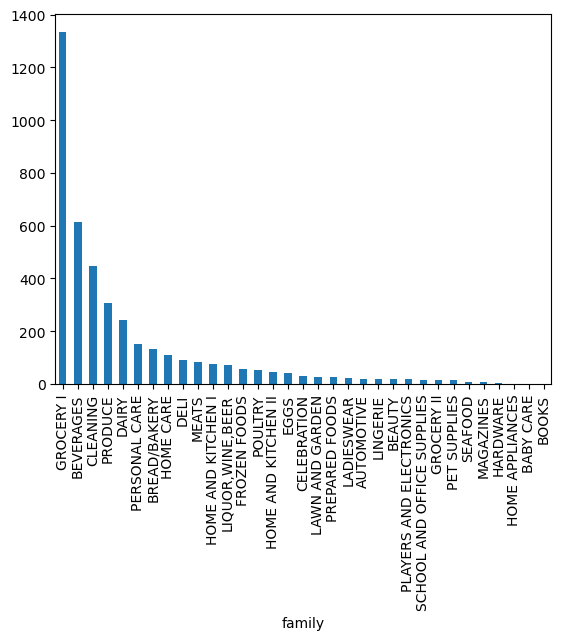

In [58]:
#count the No.of items in each category
get_different_categories(items,'family')

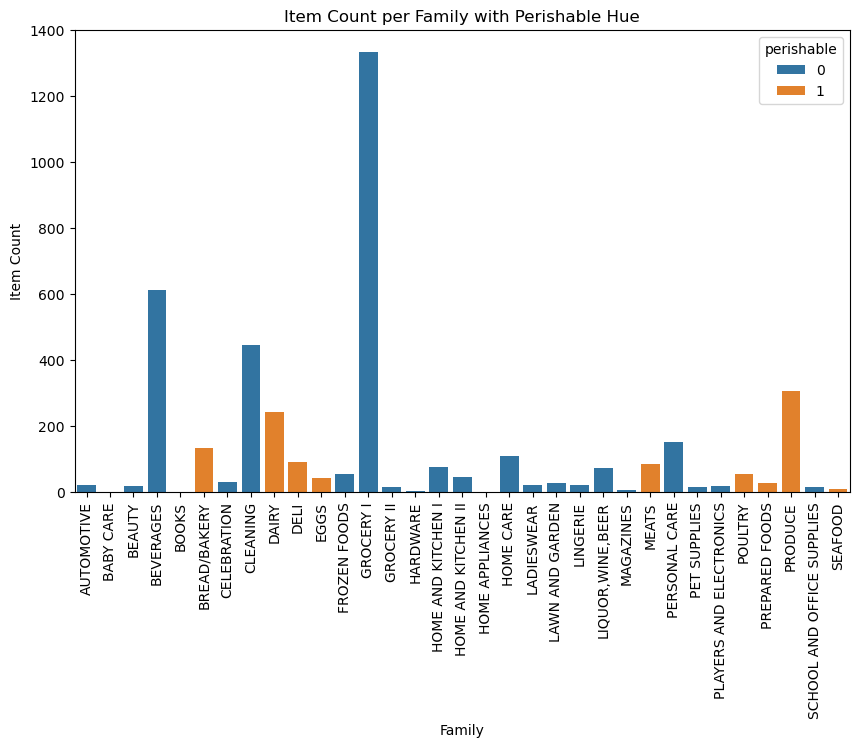

In [59]:
# Group the dataset by 'family' , 'perishable'and'item_nbr' columns
# Count the number of items and see if it is perishable or not
item_counts = items.groupby(['family', 'perishable'])['item_nbr'].count().reset_index(name='count')

# Create a Seaborn barplot
plt.figure(figsize=(10,6))
sns.barplot(data=item_counts, x='family', y='count', hue='perishable')

# Customize the plot
plt.title('Item Count per Family with Perishable Hue')
plt.xlabel('Family')
plt.ylabel('Item Count')
plt.xticks(rotation=90)
plt.show()

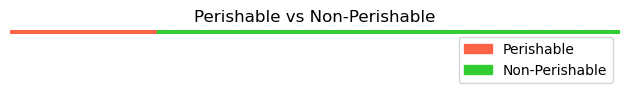

In [60]:
perishable_count = items[items['perishable'] == 1].shape[0]
non_perishable_count = items[items['perishable'] == 0].shape[0]

data = {
    'Perishable': perishable_count,
    'Non-Perishable': non_perishable_count
}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    title={'label': 'Perishable vs Non-Perishable', 'loc': 'center'},
    colors=['#FF6347', '#32CD32']  
)

plt.show()

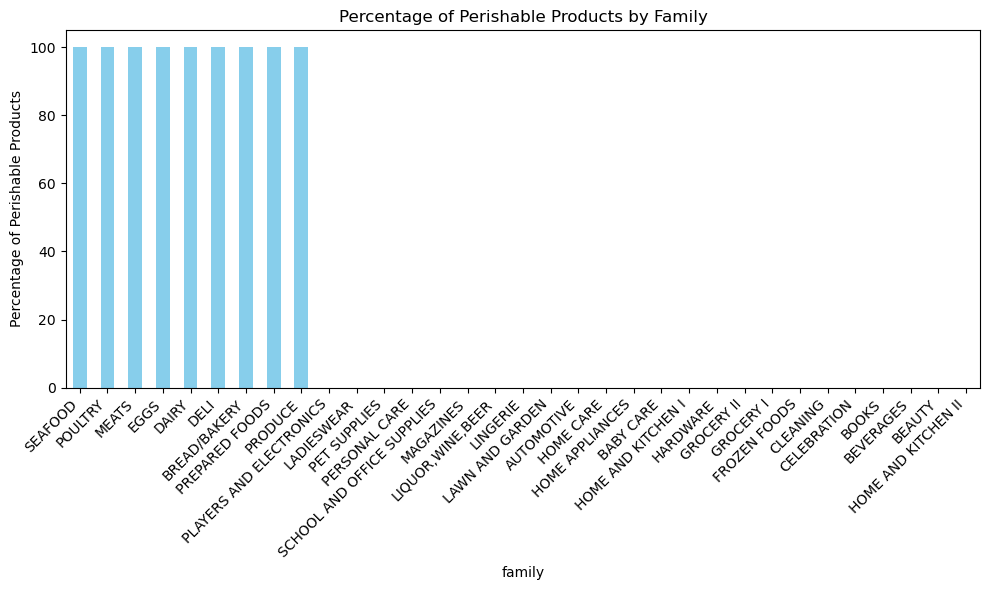

In [61]:
#caculate the percentage of perishable products by family
family_perishable = items.groupby('family')['perishable'].mean() * 100

plt.figure(figsize=(10, 6))
family_perishable.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Percentage of Perishable Products by Family')
plt.xlabel('family')
plt.ylabel('Percentage of Perishable Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

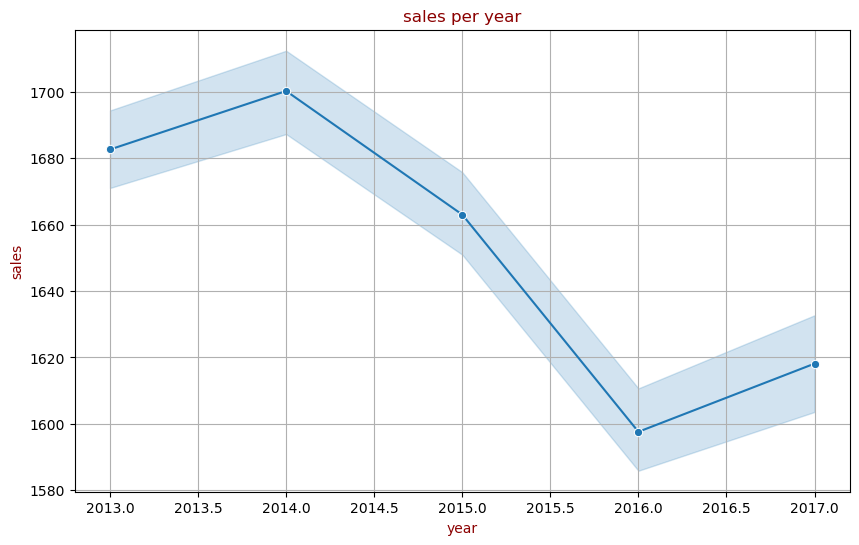

In [62]:
plt.figure(figsize=(10, 6))
#رسم خط الاتجاه بين السنه ونسبة المبيعات
sns.lineplot(x=transactions['year'], y=transactions['transactions'], marker='o')

plt.xlabel("year",color='darkred')
plt.ylabel("sales",color='darkred')
plt.title("sales per year",color='darkred')
plt.xticks(rotation=45)
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


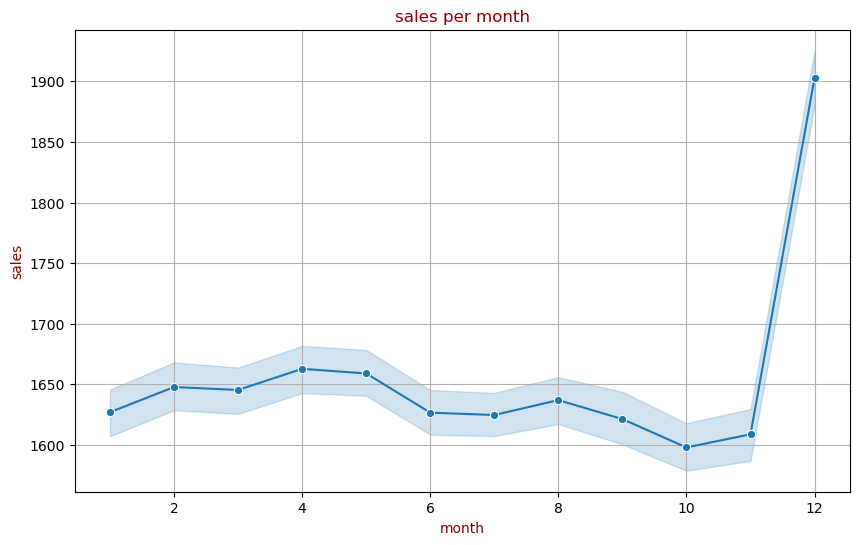

In [63]:
plt.figure(figsize=(10, 6))

# رسم خط الاتجاه بين الشهر ونسبة المبيعات
sns.lineplot(x=transactions['month'], y=transactions['transactions'], marker='o')

plt.xlabel("month",color='darkred')
plt.ylabel("sales",color='darkred')
plt.title("sales per month",color='darkred')
plt.xticks(rotation=0)
plt.grid(True)

plt.show()


In [64]:
#Groups the transactions DataFrame by the store_nbr column.
#Finds the maximum number of transactions for each store (store_nbr).
transactions.groupby('store_nbr')['transactions'].max()


store_nbr
1     3023.0
2     3628.5
3     3628.5
4     3589.0
5     3468.0
6     3628.5
7     3023.0
8     3628.5
9     3628.5
10    2242.0
11    3628.5
12    2363.0
13    1795.0
14    2510.0
15    2314.0
16    1861.0
17    3176.0
18    2623.0
19    2370.0
20    3628.5
21    3354.0
22    2412.0
23    2236.0
24    3628.5
25    3401.0
26    2184.0
27    2455.0
28    2498.0
29    2599.0
30    1443.0
31    3594.0
32    1497.0
33    2489.0
34    3628.5
35    1676.0
36    2586.0
37    3056.0
38    3577.0
39    2987.0
40    2263.0
41    2413.0
42    2368.0
43    2850.0
44    3628.5
45    3628.5
46    3628.5
47    3628.5
48    3628.5
49    3628.5
50    3628.5
51    3572.0
52    3628.5
53    2737.0
54    1811.0
Name: transactions, dtype: float64

In [65]:
avg_transactions_store_year = transactions.groupby(['store_nbr', 'year'])['transactions'].mean().reset_index()
print(avg_transactions_store_year)

     store_nbr  year  transactions
0            1  2013   1522.807163
1            1  2014   1538.082645
2            1  2015   1543.110497
3            1  2016   1503.486188
4            1  2017   1504.389381
..         ...   ...           ...
250         54  2013    878.419890
251         54  2014    878.763085
252         54  2015    885.630854
253         54  2016    851.497238
254         54  2017    816.747788

[255 rows x 3 columns]


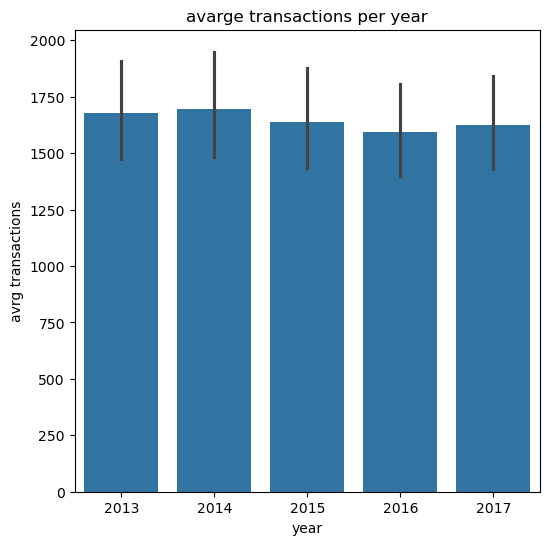

In [66]:
plt.figure(figsize=(6,6))
sns.barplot(avg_transactions_store_year,x='year',y='transactions')
plt.ylabel('avrg transactions',color='black')
plt.xlabel('year',color='black')
plt.title('avarge transactions per year',color='black')
plt.show()

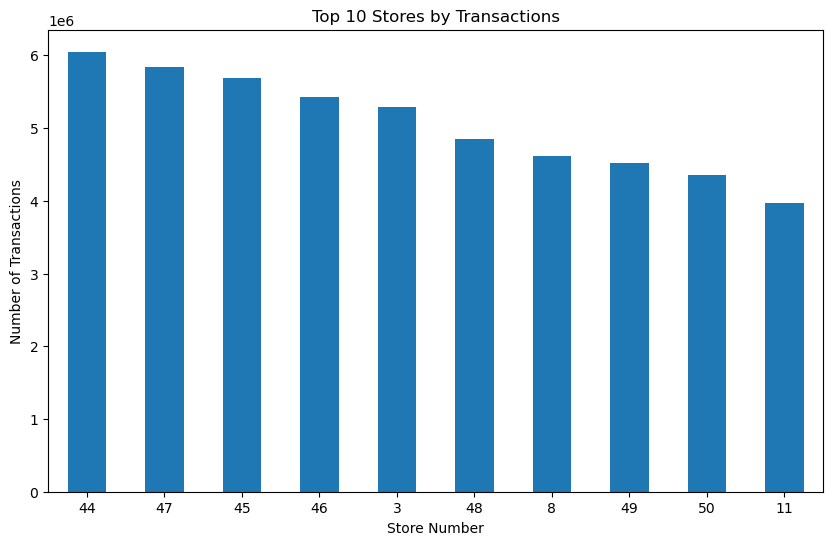

In [67]:
store_transactions = transactions.groupby('store_nbr')['transactions'].sum().sort_values(ascending=False)
top_stores = store_transactions.head(10)
plt.figure(figsize=(10,6))
top_stores.plot(kind='bar')
plt.title('Top 10 Stores by Transactions')
plt.xlabel('Store Number')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()

In [68]:
print(stores.columns)

Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')


In [69]:
print(transactions.columns)

Index(['date', 'store_nbr', 'transactions', 'avg_transaction_per_store',
       'year', 'month', 'day', 'day_of_week'],
      dtype='object')


In [70]:
transaction_store=pd.merge(stores,transactions,on='store_nbr',how='inner')
transaction_store

,store_nbr,city,state,type,cluster,date,transactions,avg_transaction_per_store,year,month,day,day_of_week
0,1,Quito,Pichincha,D,13,2013-01-02,2111.0,1523.844272,2013,1,2,2
1,1,Quito,Pichincha,D,13,2013-01-03,1833.0,1523.844272,2013,1,3,3
2,1,Quito,Pichincha,D,13,2013-01-04,1863.0,1523.844272,2013,1,4,4
3,1,Quito,Pichincha,D,13,2013-01-05,1509.0,1523.844272,2013,1,5,5
4,1,Quito,Pichincha,D,13,2013-01-06,520.0,1523.844272,2013,1,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
83483,54,El Carmen,Manabi,C,3,2017-08-11,768.0,865.924821,2017,8,11,4
83484,54,El Carmen,Manabi,C,3,2017-08-12,903.0,865.924821,2017,8,12,5
83485,54,El Carmen,Manabi,C,3,2017-08-13,1054.0,865.924821,2017,8,13,6
83486,54,El Carmen,Manabi,C,3,2017-08-14,818.0,865.924821,2017,8,14,0


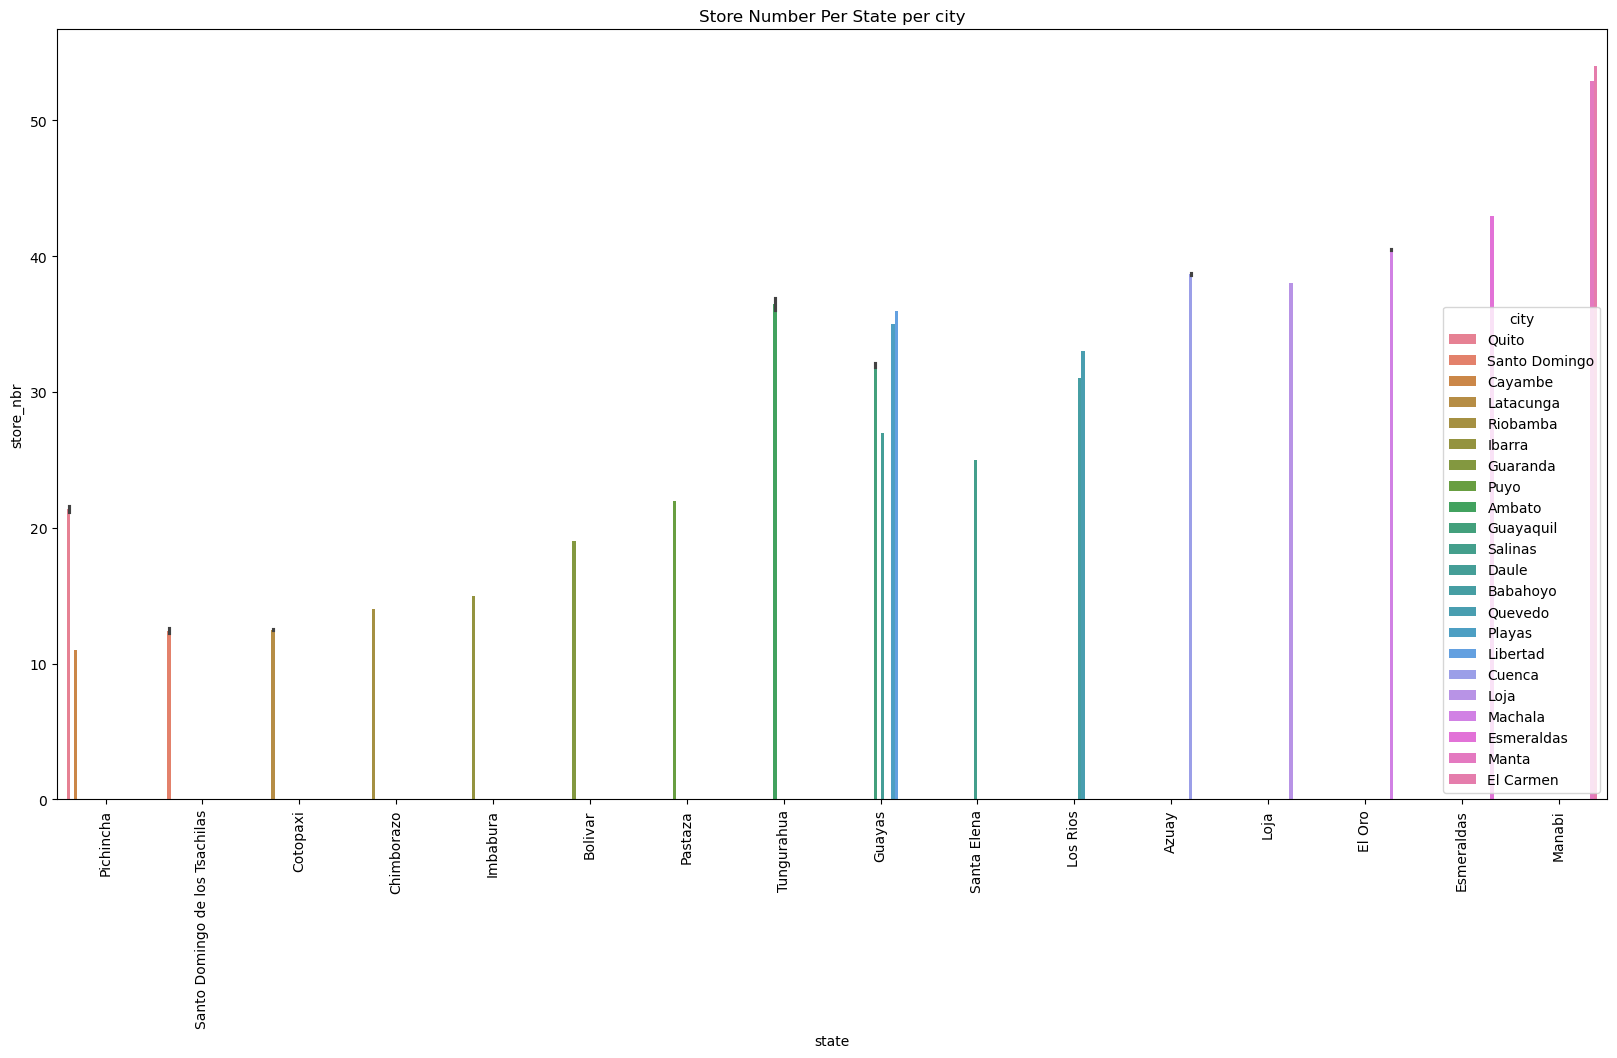

In [71]:
plt.figure(figsize=(20,10))
sns.barplot(transaction_store,x='state',y='store_nbr',hue='city')
plt.title('Store Number Per State per city')
sns.set_context(rc={"axes.labelsize": 14, "axes.titlesize": 16, "legend.fontsize": 12})
plt.xticks(rotation=90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

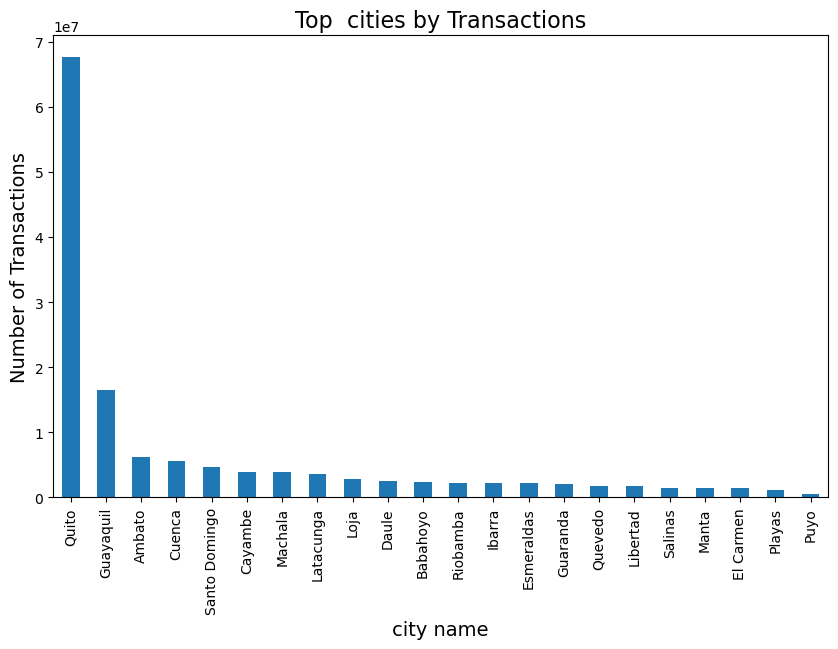

In [72]:
transaction_per_city=transaction_store.groupby('city')['transactions'].sum().sort_values(ascending=False)
top_cities=transaction_per_city
plt.figure(figsize=(10,6))
top_cities.plot(kind='bar')
plt.title('Top  cities by Transactions',color='black')
plt.xlabel('city name',color='black')
plt.ylabel('Number of Transactions',color='black')
plt.xticks(rotation=90)
plt.show

In [73]:
# Group the 'stores' DataFrame by 'state' and count the number of unique stores in each state
stores_per_state = stores.groupby('state')['store_nbr'].nunique()
# Group the 'stores' DataFrame by 'state' and count the number of unique cities in each state
cities_per_state = stores.groupby('state')['city'].nunique()
# Group the 'stores' DataFrame by 'state' and get a list of unique city names in each state
cities_names_per_state = stores.groupby('state')['city'].unique()

summary = pd.DataFrame({
    'Number_of_Stores': stores_per_state,
    'Number_of_Cities': cities_per_state,
    'Cities': cities_names_per_state
})

print(summary)


                                Number_of_Stores  Number_of_Cities  \
state                                                                
Azuay                                          3                 1   
Bolivar                                        1                 1   
Chimborazo                                     1                 1   
Cotopaxi                                       2                 1   
El Oro                                         2                 1   
Esmeraldas                                     1                 1   
Guayas                                        11                 4   
Imbabura                                       1                 1   
Loja                                           1                 1   
Los Rios                                       2                 2   
Manabi                                         3                 2   
Pastaza                                        1                 1   
Pichincha           

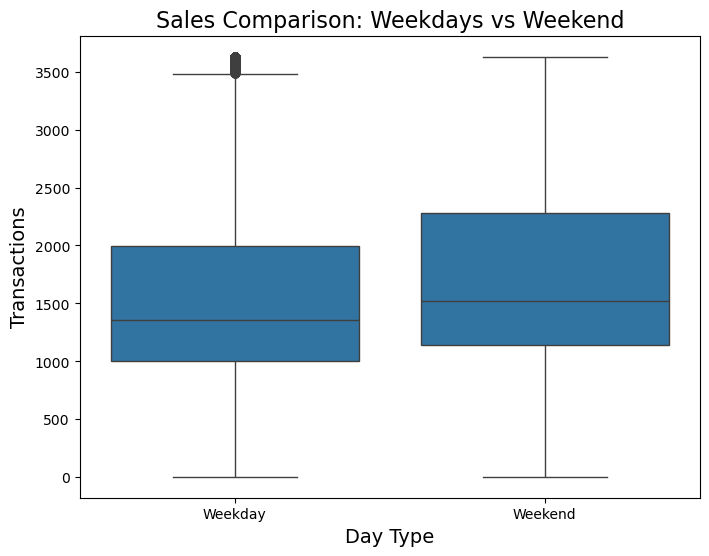

In [74]:
# Convert the 'date' column to a datetime format to enable date-based operations
transactions['date'] = pd.to_datetime(transactions['date'])
# Extract the day of the week from the 'date' column (0 = Monday, 6 = Sunday)
transactions['day_of_week'] = transactions['date'].dt.dayofweek
# Create a new column 'is_weekend' to indicate whether the day is a weekend (Saturday = 5, Sunday = 6)
transactions['is_weekend'] = transactions['day_of_week'].isin([5, 6])  

plt.figure(figsize=(8, 6))
# Create a box plot to compare transaction distributions on weekdays vs weekends
sns.boxplot(x='is_weekend', y='transactions', data=transactions)
# Rename x-axis labels for clarity (0 = Weekday, 1 = Weekend)
plt.xticks([0, 1], ['Weekday', 'Weekend'])

plt.title('Sales Comparison: Weekdays vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Transactions')
plt.show()

## Time Series Analysis

In [63]:
train["date"] = pd.to_datetime(train["date"])
train.set_index('date',inplace=True)
train.head(5)

,id,store_nbr,item_nbr,unit_sales,onpromotion
date,,,,,
2013-01-01,0,25,103665,7.0,0
2013-01-01,1,25,105574,1.0,0
2013-01-01,2,25,105575,2.0,0
2013-01-01,3,25,108079,1.0,0
2013-01-01,4,25,108701,1.0,0


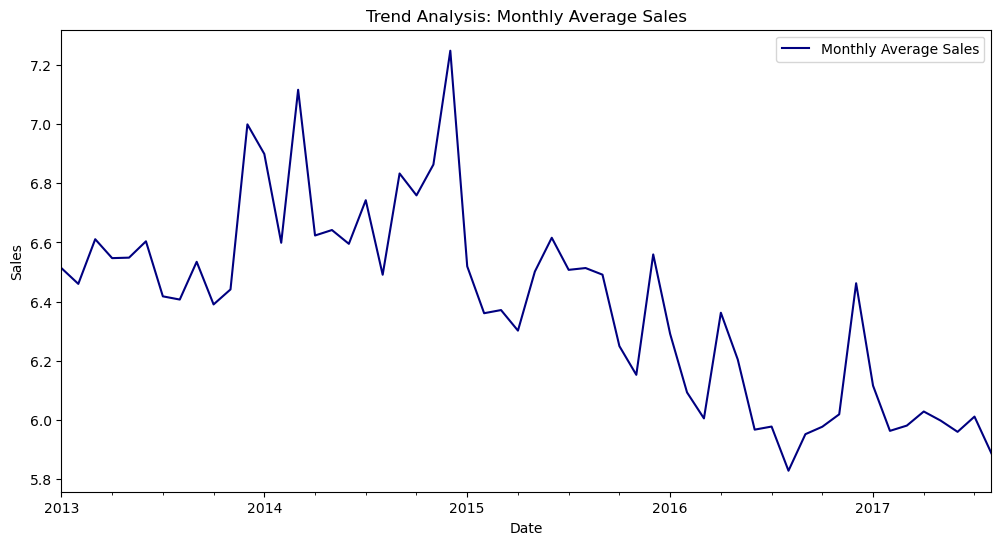

In [25]:
plt.figure(figsize=(12,6))
train['unit_sales'].resample('M').mean().plot(label='Monthly Average Sales', color='navy')
plt.title("Trend Analysis: Monthly Average Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

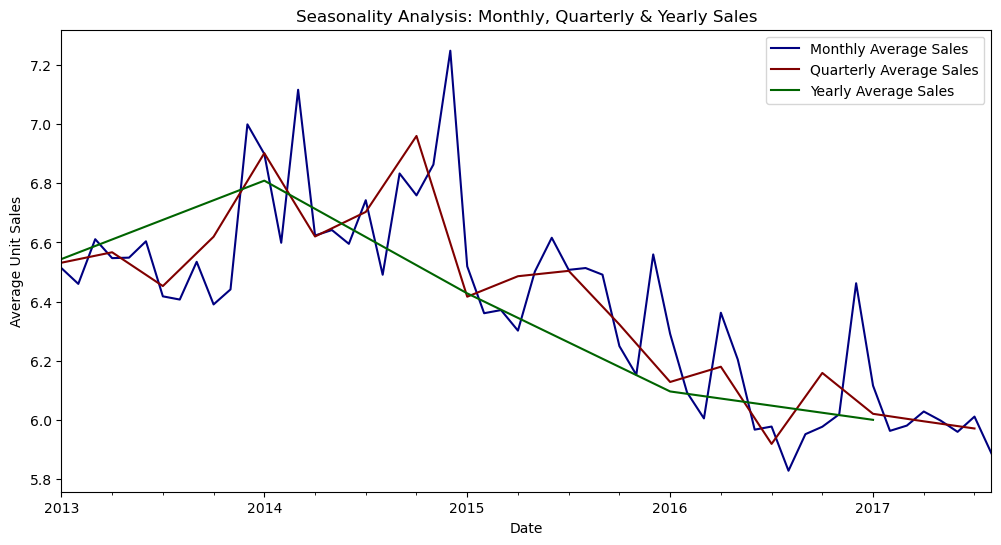

In [29]:
plt.figure(figsize=(12,6))
train['unit_sales'].resample('M').mean().plot(label='Monthly Average Sales', color='navy')
train['unit_sales'].resample('Q').mean().plot(label='Quarterly Average Sales', color='maroon')
train['unit_sales'].resample('Y').mean().plot(label='Yearly Average Sales', color='darkgreen')

plt.title("Seasonality Analysis: Monthly, Quarterly & Yearly Sales")
plt.xlabel("Date")
plt.ylabel("Average Unit Sales")
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

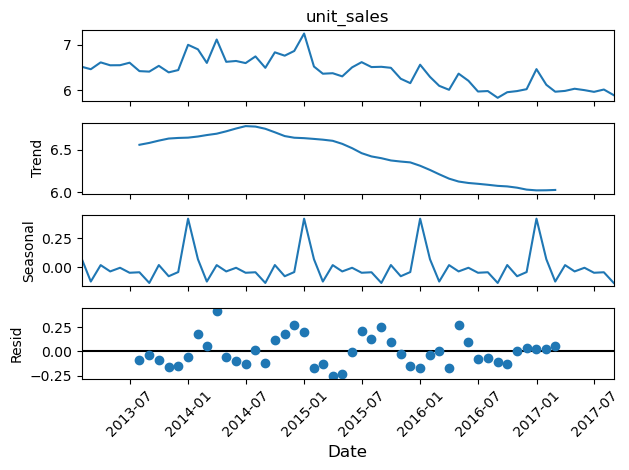

In [71]:
plt.figure(figsize=(12,6))
result = seasonal_decompose(train['unit_sales'].resample('M').mean(),model='additive',period=12)
result.plot()
plt.xlabel("Date", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### ADF Test

In [105]:
ts = train['unit_sales'].resample('M').mean().dropna()
adf_res = adfuller(ts)
print(f'{'ADF test result'.center(30).upper()}')
print(f'ADF Statistic: {adf_res[0]}')
print(f'p-value: {adf_res[1]}')
for key, value in adf_res[4].items():
    print(f'{key}: {value}')
if adf_res[1] <= 0.05 :
    print('\nThe time series is stationary')
else:
    print('\nThe time series is non-stationary')

       ADF TEST RESULT        
ADF Statistic: -1.0993911486943362
p-value: 0.7153146469463694
1%: -3.560242358792829
5%: -2.9178502070837
10%: -2.5967964150943397

The time series is non-stationary


In [113]:
ts_diff = train['unit_sales'].resample('M').mean().diff().dropna()
adf_res = adfuller(ts_diff)
print(f'{'ADF test result'.center(30).upper()}')
print(f'ADF Statistic: {adf_res[0]}')
print(f'p-value: {adf_res[1]}')
for key, value in adf_res[4].items():
    print(f'{key}: {value}')
if adf_res[1] <= 0.05 :
    print('\nThe time series is stationary')
else:
    print('\nThe time series is non-stationary')

       ADF TEST RESULT        
ADF Statistic: -8.071592930820989
p-value: 1.54431840942621e-12
1%: -3.560242358792829
5%: -2.9178502070837
10%: -2.5967964150943397

The time series is stationary


#### Sales and Holidays Correlation

In [35]:
train_holidays = train.copy()
train_holidays['is_holiday'] = train_holidays['date'].isin(holidays_events['date']).astype(int)
holiday_corr = train_holidays[['unit_sales', 'is_holiday']].corr()
print(f'Correlation between sales and holidays:\n {holiday_corr}')

Correlation between sales and holidays:
             unit_sales  is_holiday
unit_sales    1.000000    0.012208
is_holiday    0.012208    1.000000


#### Sales and Promotions Correlation

In [37]:
promotion_corr = train[['unit_sales','onpromotion']].corr()
print(f'Correlation between sales and promotions:\n {promotion_corr}')

Correlation between sales and promotions:
              unit_sales  onpromotion
unit_sales     1.000000     0.080406
onpromotion    0.080406     1.000000


#### Sales and Oil-Prices Correlation

In [41]:
train_oil = train.copy()
train_oil = train.merge(oil,on='date',how='inner')
oil_corr = train_oil[['unit_sales', 'dcoilwtico']].corr()
print(f'Correlation between sales and oil:\n {oil_corr}')

Correlation between sales and oil:
             unit_sales  dcoilwtico
unit_sales    1.000000    0.031228
dcoilwtico    0.031228    1.000000
